In [ ]:
# Imports
import random
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras as keras

from math import *

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

from __future__ import division
from __future__ import print_function

In [ ]:
# Training Data
encoder = OneHotEncoder(sparse=False)

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

x_train_norm = (x_train - x_train.min(axis=0)) / (x_train.max(axis=0) - x_train.min(axis=0))
x_test_norm = (x_test - x_test.min(axis=0)) / (x_test.max(axis=0) - x_test.min(axis=0))

y_train_enc = encoder.fit_transform(y_train.reshape(-1,1))
y_test_enc = encoder.fit_transform(y_test.reshape(-1,1))

seen = set()
sample_size = int(0.2* len(x_train_norm))
indexes = [i for i in range(len(x_train_norm))]

random_indexes = random.sample(indexes, sample_size)

x_train_norm_temp = []
y_train_enc_temp = []

for i in random_indexes:
    x_train_norm_temp.append(x_train_norm[i])
    y_train_enc_temp.append(y_train_enc[i])

x_train_norm = np.array(x_train_norm_temp)
y_train_enc = np.array(y_train_enc_temp)

print(x_train_norm.shape)
print(y_train_enc.shape)

(10000, 32, 32, 3)
(10000, 10)


Final training set accuracy: 0.385700
313/313 [==============================] - 1s 4ms/step - loss: 1.7418 - accuracy: 0.3744
Final test set loss: 1.741783
Final test set accuracy: 0.374400


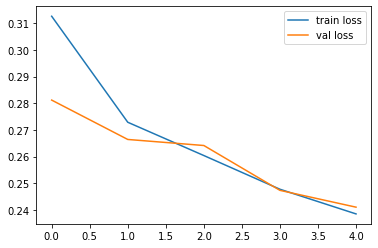

In [ ]:
# MLP
mlp = keras.models.Sequential()

mlp.add(Flatten(input_shape=(32, 32, 3)))
mlp.add(Dense(512, activation="sigmoid"))
mlp.add(Dense(10, activation='softmax', name='output'))

optimizer = Adam(lr=0.001)
mlp.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
h = mlp.fit(x_train_norm, y_train_enc, verbose=0, batch_size=32, epochs=5, validation_data=(x_test_norm, y_test_enc))
plt.plot(np.log10(h.history['loss']))
plt.plot(np.log10(h.history['val_loss']))
plt.legend(['train loss', 'val loss'])
print('Final training set accuracy: {:4f}'.format(h.history['accuracy'][-1]))

results = mlp.evaluate(x_test_norm, y_test_enc, verbose=1)

print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))


Epoch 1/5
313/313 [==============================] - 118s 375ms/step - loss: 2.1633 - accuracy: 0.2918 - val_loss: 1.4820 - val_accuracy: 0.4725
Epoch 2/5
313/313 [==============================] - 112s 359ms/step - loss: 1.2920 - accuracy: 0.5497 - val_loss: 1.3586 - val_accuracy: 0.5175
Epoch 3/5
313/313 [==============================] - 112s 358ms/step - loss: 1.0076 - accuracy: 0.6582 - val_loss: 1.4301 - val_accuracy: 0.5054
Epoch 4/5
313/313 [==============================] - 112s 359ms/step - loss: 0.7585 - accuracy: 0.7489 - val_loss: 1.4513 - val_accuracy: 0.5158
Epoch 5/5
313/313 [==============================] - 112s 358ms/step - loss: 0.5081 - accuracy: 0.8411 - val_loss: 1.5453 - val_accuracy: 0.5192
Final training set accuracy: 0.827400
313/313 [==============================] - 20s 63ms/step - loss: 1.5453 - accuracy: 0.5192
Final test set loss: 1.545303
Final test set accuracy: 0.519200


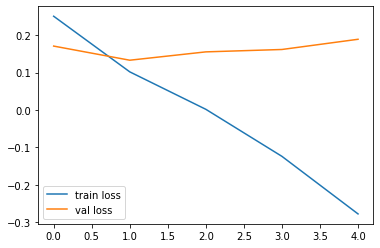

In [ ]:
# CNN 1
cnn = Sequential()
cnn.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
cnn.add(Flatten())
cnn.add(Dense(512, activation='sigmoid'))
cnn.add(Dense(10, activation='softmax', name='output'))
cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


h = cnn.fit(x_train_norm, y_train_enc, verbose=1, batch_size=32, epochs=5, validation_data=(x_test_norm, y_test_enc))
print('Final training set accuracy: {:4f}'.format(h.history['accuracy'][-1]))
plt.plot(np.log10(h.history['loss']))
plt.plot(np.log10(h.history['val_loss']))
plt.legend(['train loss', 'val loss'])

results = cnn.evaluate(x_test_norm, y_test_enc, verbose=1)

print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))

Epoch 1/5
313/313 [==============================] - 41s 130ms/step - loss: 2.2092 - accuracy: 0.1890 - val_loss: 1.6650 - val_accuracy: 0.3879
Epoch 2/5
313/313 [==============================] - 40s 129ms/step - loss: 1.5835 - accuracy: 0.4222 - val_loss: 1.4617 - val_accuracy: 0.4748
Epoch 3/5
313/313 [==============================] - 40s 129ms/step - loss: 1.3615 - accuracy: 0.5032 - val_loss: 1.3263 - val_accuracy: 0.5135
Epoch 4/5
313/313 [==============================] - 41s 130ms/step - loss: 1.2345 - accuracy: 0.5477 - val_loss: 1.2290 - val_accuracy: 0.5620
Epoch 5/5
313/313 [==============================] - 41s 131ms/step - loss: 1.0682 - accuracy: 0.6193 - val_loss: 1.1461 - val_accuracy: 0.5919
Final training set accuracy: 0.614900
Final test set loss: 1.146087
Final test set accuracy: 0.591900


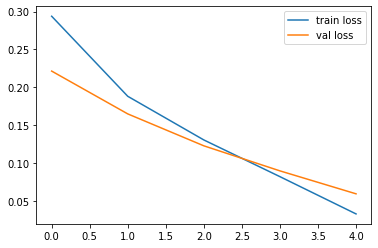

In [ ]:
# CNN 2
cnn = Sequential()
cnn.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
cnn.add(MaxPool2D(pool_size=(2, 2)))
cnn.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'))
cnn.add(MaxPool2D(pool_size=(2, 2)))
cnn.add(Flatten())
cnn.add(Dense(512, activation='sigmoid'))
cnn.add(Dropout(0.2))
cnn.add(Dense(512, activation='sigmoid'))
cnn.add(Dropout(0.2))
cnn.add(Dense(10, activation='softmax', name='output'))
cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

h = cnn.fit(x_train_norm, y_train_enc, verbose=1, batch_size=32, epochs=5, validation_data=(x_test_norm, y_test_enc))
print('Final training set accuracy: {:4f}'.format(h.history['accuracy'][-1]))
plt.plot(np.log10(h.history['loss']))
plt.plot(np.log10(h.history['val_loss']))
plt.legend(['train loss', 'val loss'])
results = cnn.evaluate(x_test_norm, y_test_enc, verbose=0)

print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))